In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
## ignoring harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [4]:
df.index.freq = 'D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


**Here we can see that there might be two exogenous variable named holiday and weekday are present. First we will try to use the simple SARIMA model and after that we try the SARIMAX model. At the end, we will try to differenciate the result of the two models**

In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [8]:
df1 = df.dropna()

In [9]:
df1.isnull().sum()

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

In [10]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [11]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

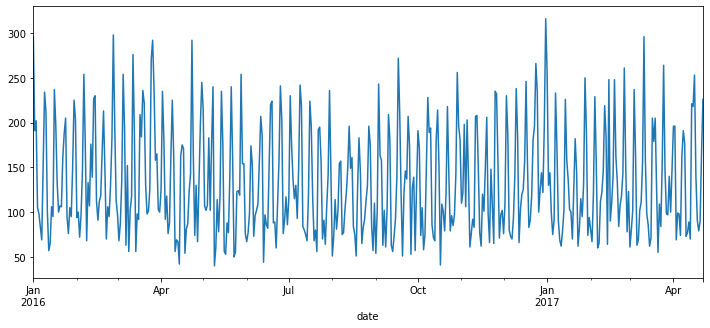

In [14]:
df1['total'].plot(figsize=(12,5));

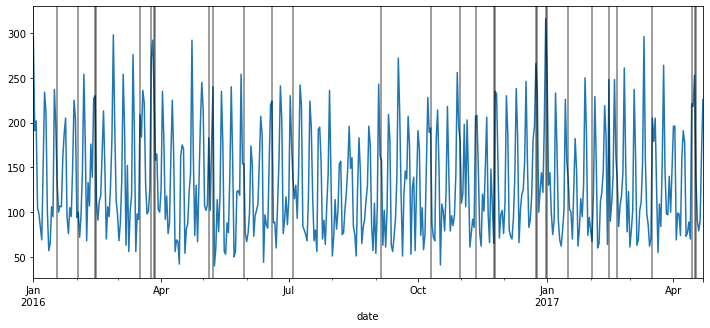

In [15]:
ax = df1['total'].plot(figsize=(12,5))

for day in df1[df1['holiday'] == 1].index:
    ax.axvline(x=day,color='k',alpha=0.5);

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

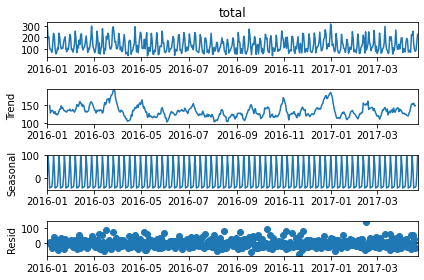

In [17]:
result = seasonal_decompose(df1['total'])
result.plot();

<AxesSubplot:xlabel='date'>

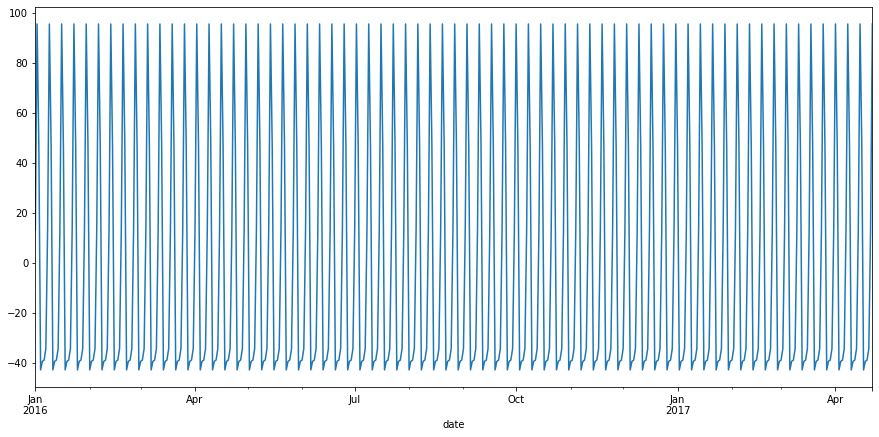

In [18]:
result.seasonal.plot(figsize=(15,7))

**By counting the number of spaces between Jan and Apr which is 12, we can infer that the data is seasonal by week**

#### SARIMA MODEL

In [19]:
df1.shape[0]

478

In [20]:
train = df1.iloc[:436]

In [21]:
test = df1.iloc[436:]

### SARIMA Model

In [22]:
from pmdarima import auto_arima

In [23]:
auto_arima(df1['total'],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.47 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.02 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=5333.149, Time=0.91 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4816.580, Time=0.74 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.39 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4951.804, Time=1.23 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.57 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4772.347, Time=0.65 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
model = SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1,0,1,7))

In [27]:
fitted_model = model.fit()

In [28]:
start = len(train)
end = len(train) + len(test) - 1

In [29]:
predictions = fitted_model.predict(start=start,end=end).rename("SARIMA Predicions")

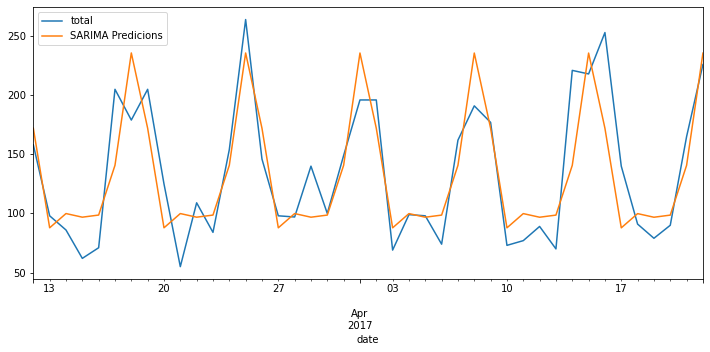

In [30]:
test['total'].plot(figsize=(12,5),legend=True)
predictions.plot(legend=True);

**Checking the performance of the model using root mean squared error**

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
rmse = np.sqrt(mean_squared_error(test['total'],predictions))

In [33]:
rmse

31.913882348270587

In [34]:
test['total'].mean()

134.26190476190476

**For a target column having the values with the mean approximately 134, the root mean squared error of 34 is quite large. So we can infer from this that the SARIMA model is not doing very well on this data**

**So let's just check if considering the holidays column as exogenous variable improves the predictions made by the model**

### SARIMAX Model

In [35]:
 auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,trace=True,m=7)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5235.582, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4786.350, Time=0.93 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4969.638, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6068.575, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5171.193, Time=0.30 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4724.445, Time=0.86 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=4990.373, Time=0.60 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4816.526, Time=1.33 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4887.554, Time=1.03 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4865.615, Time=0.80 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=5161.219, T

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [37]:
## training sarimax model
fitted_model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),
               seasonal_order=(1,0,1,7)).fit()

In [38]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.062
Date:                             Thu, 28 Apr 2022   AIC                           4188.124
Time:                                     01:36:34   BIC                           4208.512
Sample:                                 01-01-2016   HQIC                          4196.170
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5061      3.763     18.203      0.000      61.130      75.882
ar.L1          0.2115      0.044      4.805      0.000       0.125       0.298
ar.S.L7        0.9999   9.02e-05   1.11e+04      0.000       1.000       1.000
ma.S.L7       -0.9460      0.023    -41.601      0.000      -0.991      -0.901
sigma2       783.4330     45.150     17.352      0.000     694.941     871.925
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.24
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.23
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
start = len(train)
end = len(train) + len(test) - 1 

In [41]:
## note that while predicting also, we need to know exogenous variables
predictions = fitted_model.predict(start=start,end=end,exog=test['holiday'])

In [42]:
predictions = predictions.rename('SARIMAX Predictions')

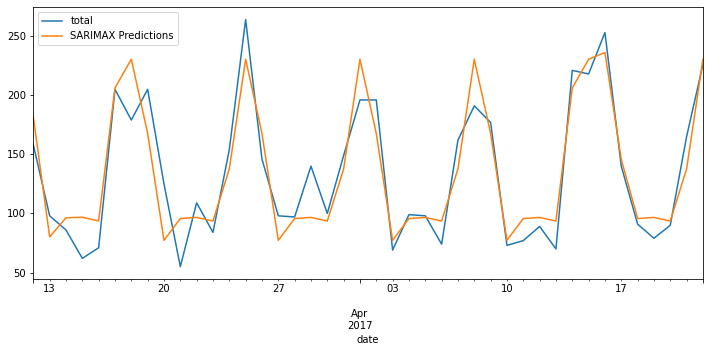

In [44]:
test['total'].plot(figsize=(12,5),legend=True)
predictions.plot(legend=True);

**Checking the performance of the model using the root mean squared error**

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
rmse = np.sqrt(mean_squared_error(test['total'],predictions))

In [47]:
rmse

23.26684846471413

In [48]:
test['total'].mean()

134.26190476190476

**Using SARIMAX model reduced the rmse value by 8. So, let's train the model using the whole data and try to forecase in the future**

In [63]:
fitted_model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,0),
               seasonal_order=(1,0,1,7)).fit()

C:\Users\shiva\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
df.shape[0]

517

In [71]:
df.iloc[477:]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN


**After the index 478, we have exogenous variable but not the total column. So let's forecast it using the fitted model**

In [66]:
exog_forecast = df[478:]['holiday']

In [73]:
forecasted_values = fitted_model.predict(len(df1),len(df1)+38,exog=exog_forecast)

In [74]:
forecasted_values = forecasted_values.rename('FIANL SARIMAX PREDICTIONS')

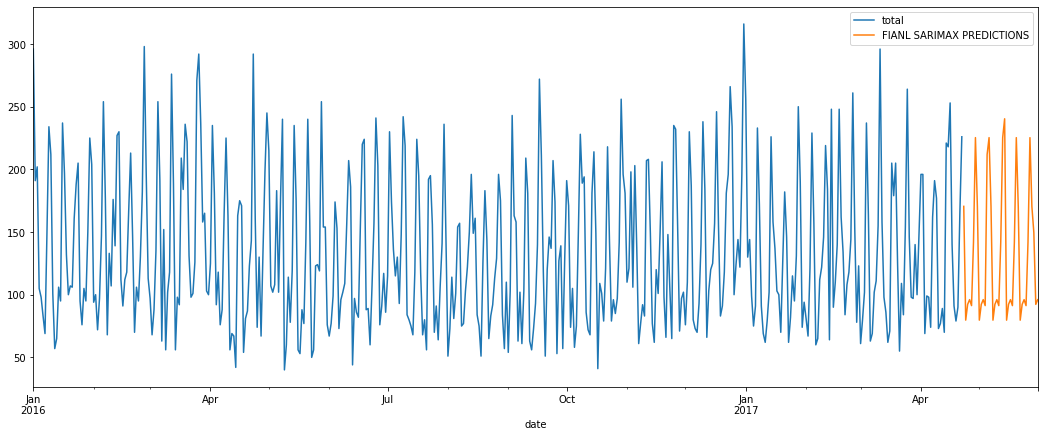

In [78]:
df1['total'].plot(figsize=(18,7),legend=True)
forecasted_values.plot(legend=True);